##1 - Importação das Libs e verificações iniciais

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [ ]:
df_iris = sns.load_dataset("iris")

In [ ]:
df_iris.shape

(150, 5)

In [ ]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##2 - Separação treino/teste

In [ ]:
X = df_iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = df_iris["species"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##3 - Predições com gráficos de matrtiz de confusão e árvore de decisão

###Parâmetros e acurácias de cada gráfico sendo informados no título

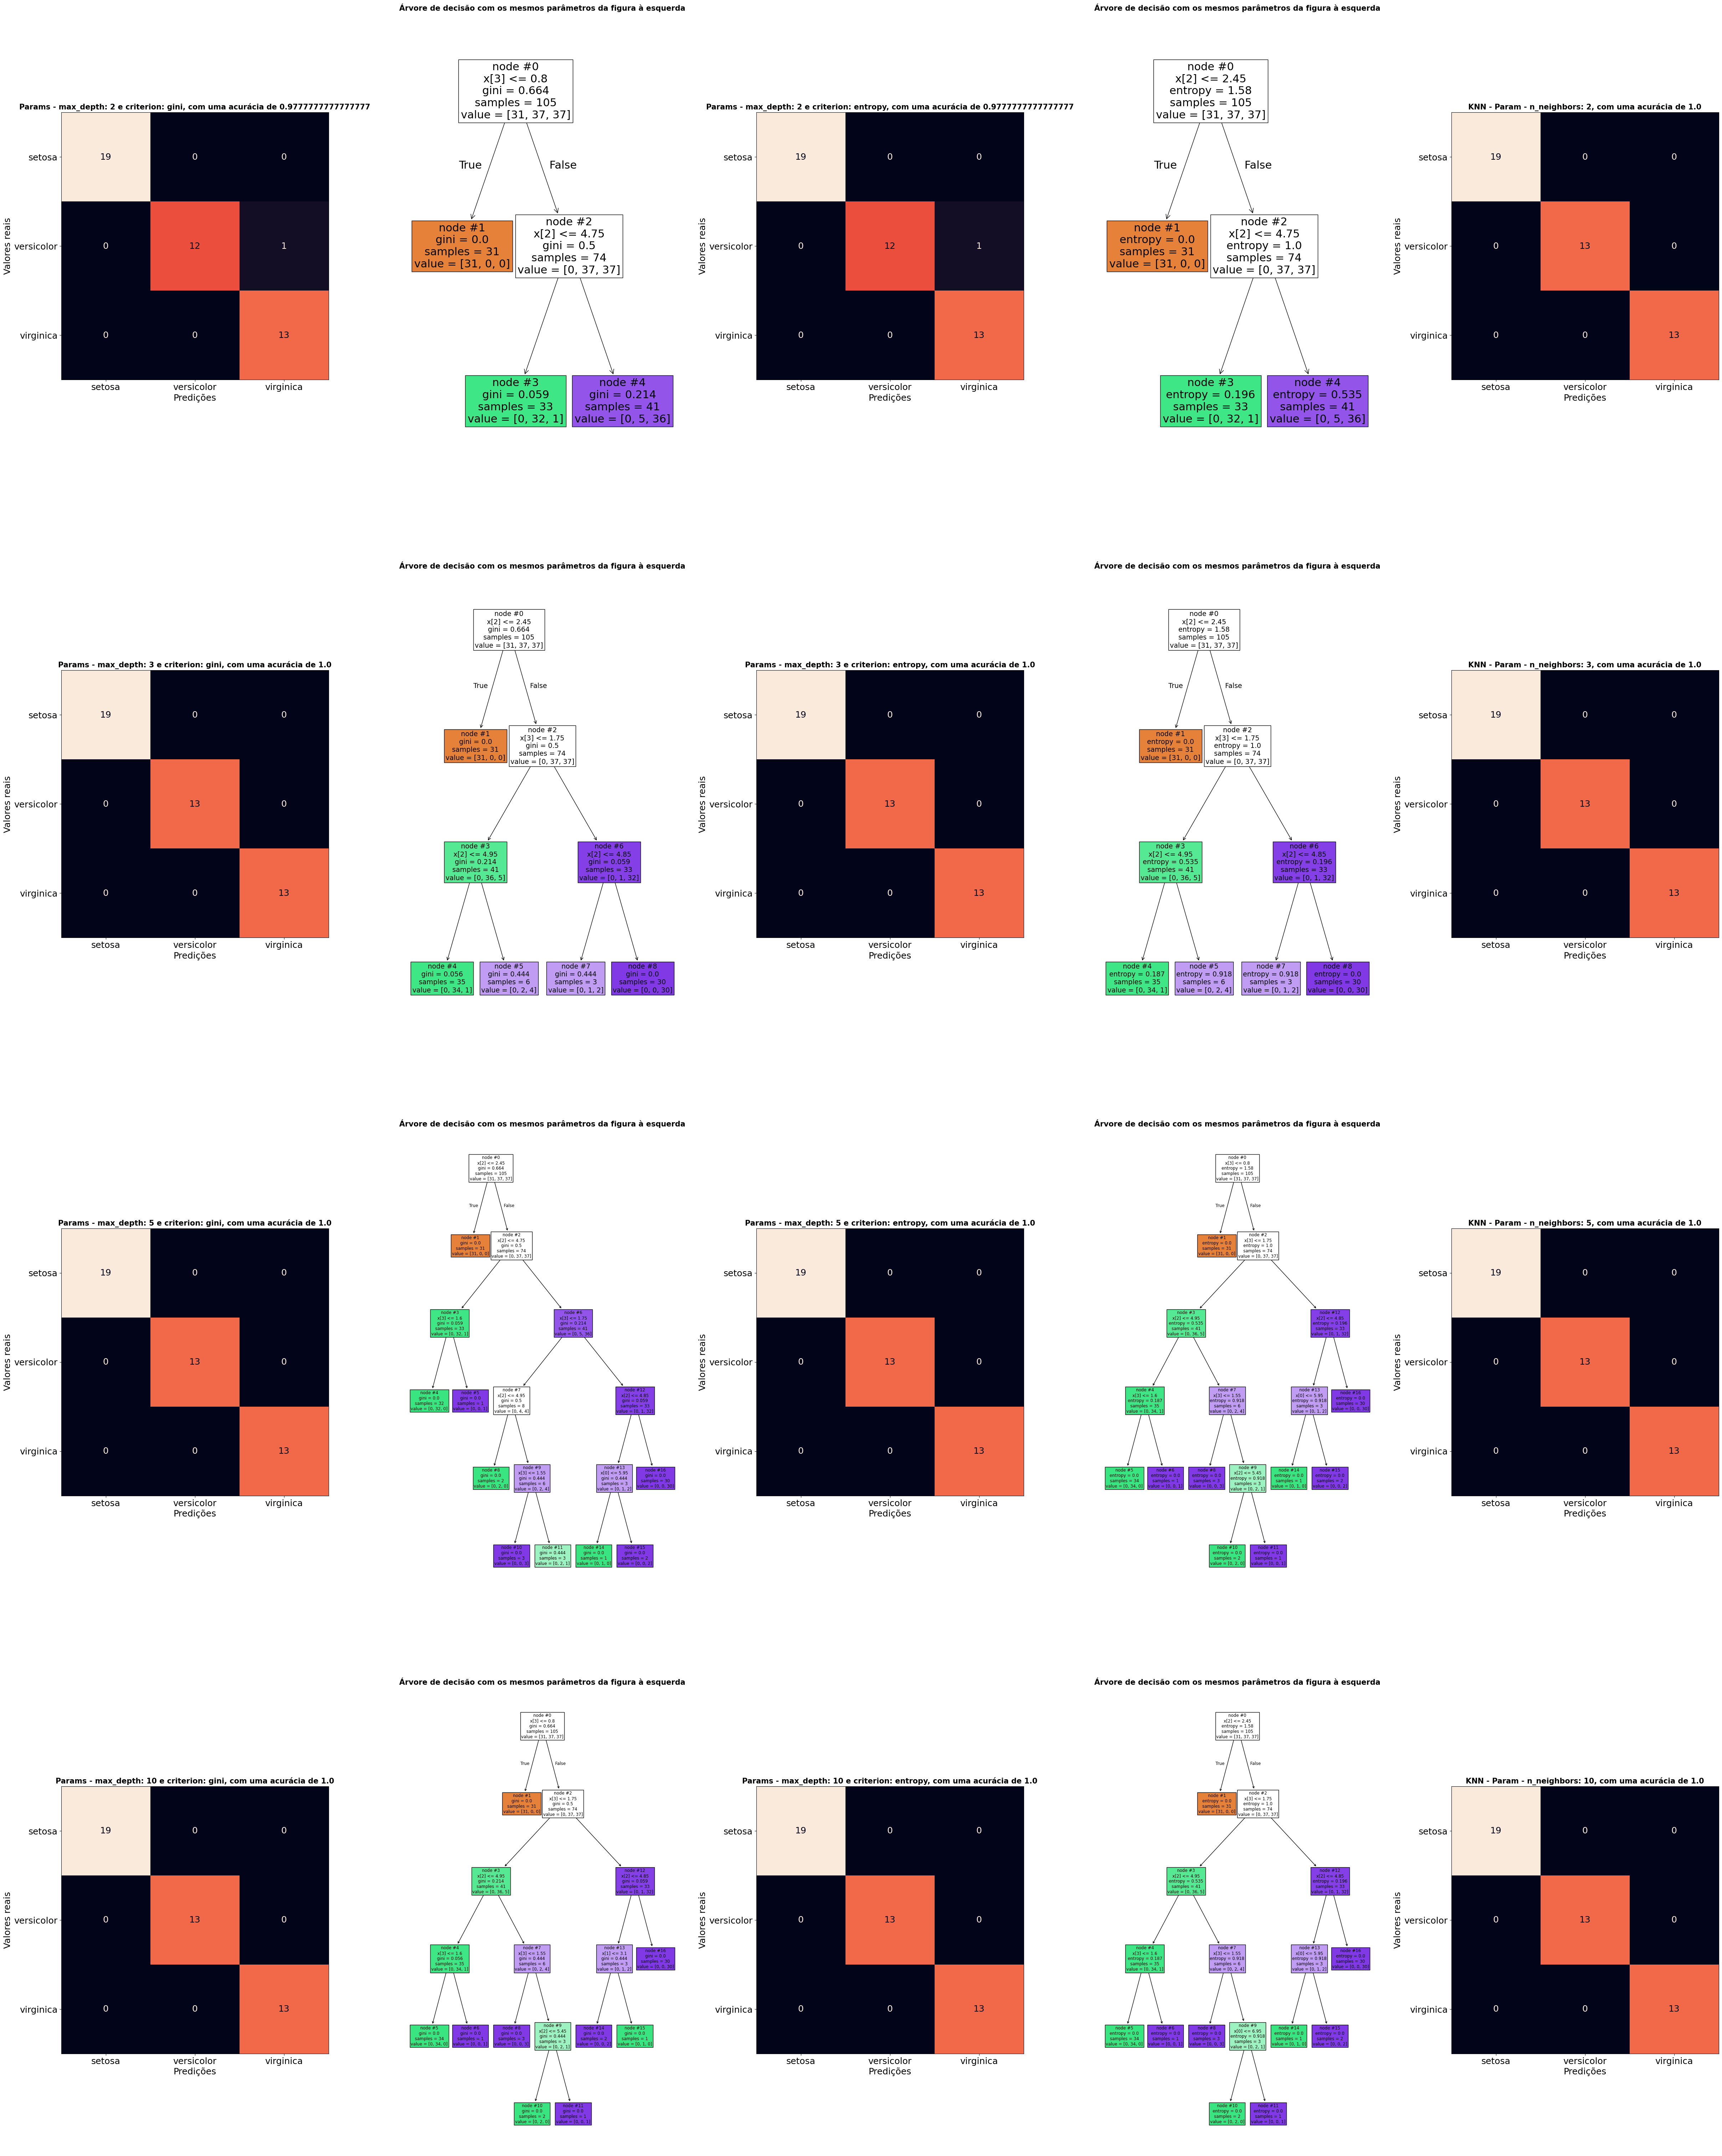

In [ ]:
# Listas de diferentes parâmetros
list_max_depth = [2, 3, 5, 10]
list_criterion = ['gini', 'entropy']


# Ajuste do tamanho fonte e de gráficos
plt.rcParams.update({'font.size': 18})
fig, axes = plt.subplots(len(list_max_depth), (len(list_criterion)*2)+1,
                         figsize=(60, 40), sharey=False)


# Criação dos gráfico utilizando-se dos parâmtros e ajustes realizados acima
for i_max_depth in range(0, len(list_max_depth)):
  for i_criterion in range(0, len(list_criterion)):
    # Predições - DecisionTreeClassifier
    model = DecisionTreeClassifier(criterion=list_criterion[i_criterion],
                                   max_depth=list_max_depth[i_max_depth])
    model.fit(X_train, y_train)
    y_pred_tree = model.predict(X_test)


    # Métricas - DecisionTreeClassifier
    acc_tree = accuracy_score(y_test, y_pred_tree)


    # Gráficos - Matriz de confusão e Árvore de decisão
    ax1 = ConfusionMatrixDisplay.from_predictions(
        ax=axes[i_max_depth][i_criterion*2],
        y_true=y_test, y_pred=y_pred_tree,
        display_labels=model.classes_,
        colorbar=False,
        xticks_rotation="horizontal",
        cmap="rocket")
    title_ax1 = f"Params - max_depth: {list_max_depth[i_max_depth]} e criterion: {list_criterion[i_criterion]}, com uma acurácia de {acc_tree}"
    axes[i_max_depth][i_criterion*2].set_title(title_ax1, fontsize=15,
                                               weight='bold')
    axes[i_max_depth][i_criterion*2].set_xlabel('Predições')
    axes[i_max_depth][i_criterion*2].set_ylabel('Valores reais')

    ax2 = plot_tree(ax=axes[i_max_depth][(i_criterion*2)+1],
                    decision_tree=model, filled=True, node_ids=True)
    title_ax2 = f"Árvore de decisão com os mesmos parâmetros da figura à esquerda"
    axes[i_max_depth][(i_criterion*2)+1].set_title(title_ax2, fontsize=15,
                                                   weight='bold')


  # Predições - KNN
  knn = KNeighborsClassifier(n_neighbors=list_max_depth[i_max_depth])
  knn.fit(X_train, y_train)
  y_pred_knn = knn.predict(X_test)


  # Métricas - KNN
  acc_knn = accuracy_score(y_test, y_pred_knn)


  # Gráficos - Matriz de confusão
  ax3 = ConfusionMatrixDisplay.from_predictions(ax=axes[i_max_depth][-1],
                                                y_true=y_test,
                                                y_pred=y_pred_knn,
                                                display_labels=model.classes_,
                                                colorbar=False,
                                                xticks_rotation="horizontal",
                                                cmap="rocket")
  title_ax3 = f"KNN - Param - n_neighbors: {list_max_depth[i_max_depth]}, com uma acurácia de {acc_knn}"
  axes[i_max_depth][-1].set_title(title_ax3, fontsize=15, weight='bold')
  axes[i_max_depth][-1].set_xlabel('Predições')
  axes[i_max_depth][-1].set_ylabel('Valores reais')


# Ajuste e plot do grid de gráficos
plt.subplots_adjust(bottom=4, top=5.5, wspace=0.3, hspace=0.2)
plt.show()